In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
train_df[train_df["target"] == 0]["text"].values[1]

'I love fruits'

In [6]:
train_df[train_df["target"] == 1]["text"].values[1]

'Forest fire near La Ronge Sask. Canada'

In [7]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [8]:
test_df.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [9]:
print(len(train_df))
train_df = train_df.drop_duplicates('text', keep='last')
print(len(train_df))

7613
7503


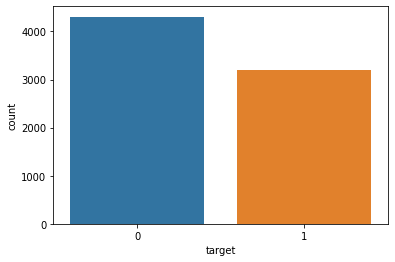

In [10]:
sns.countplot(data=train_df,x='target')

221
221


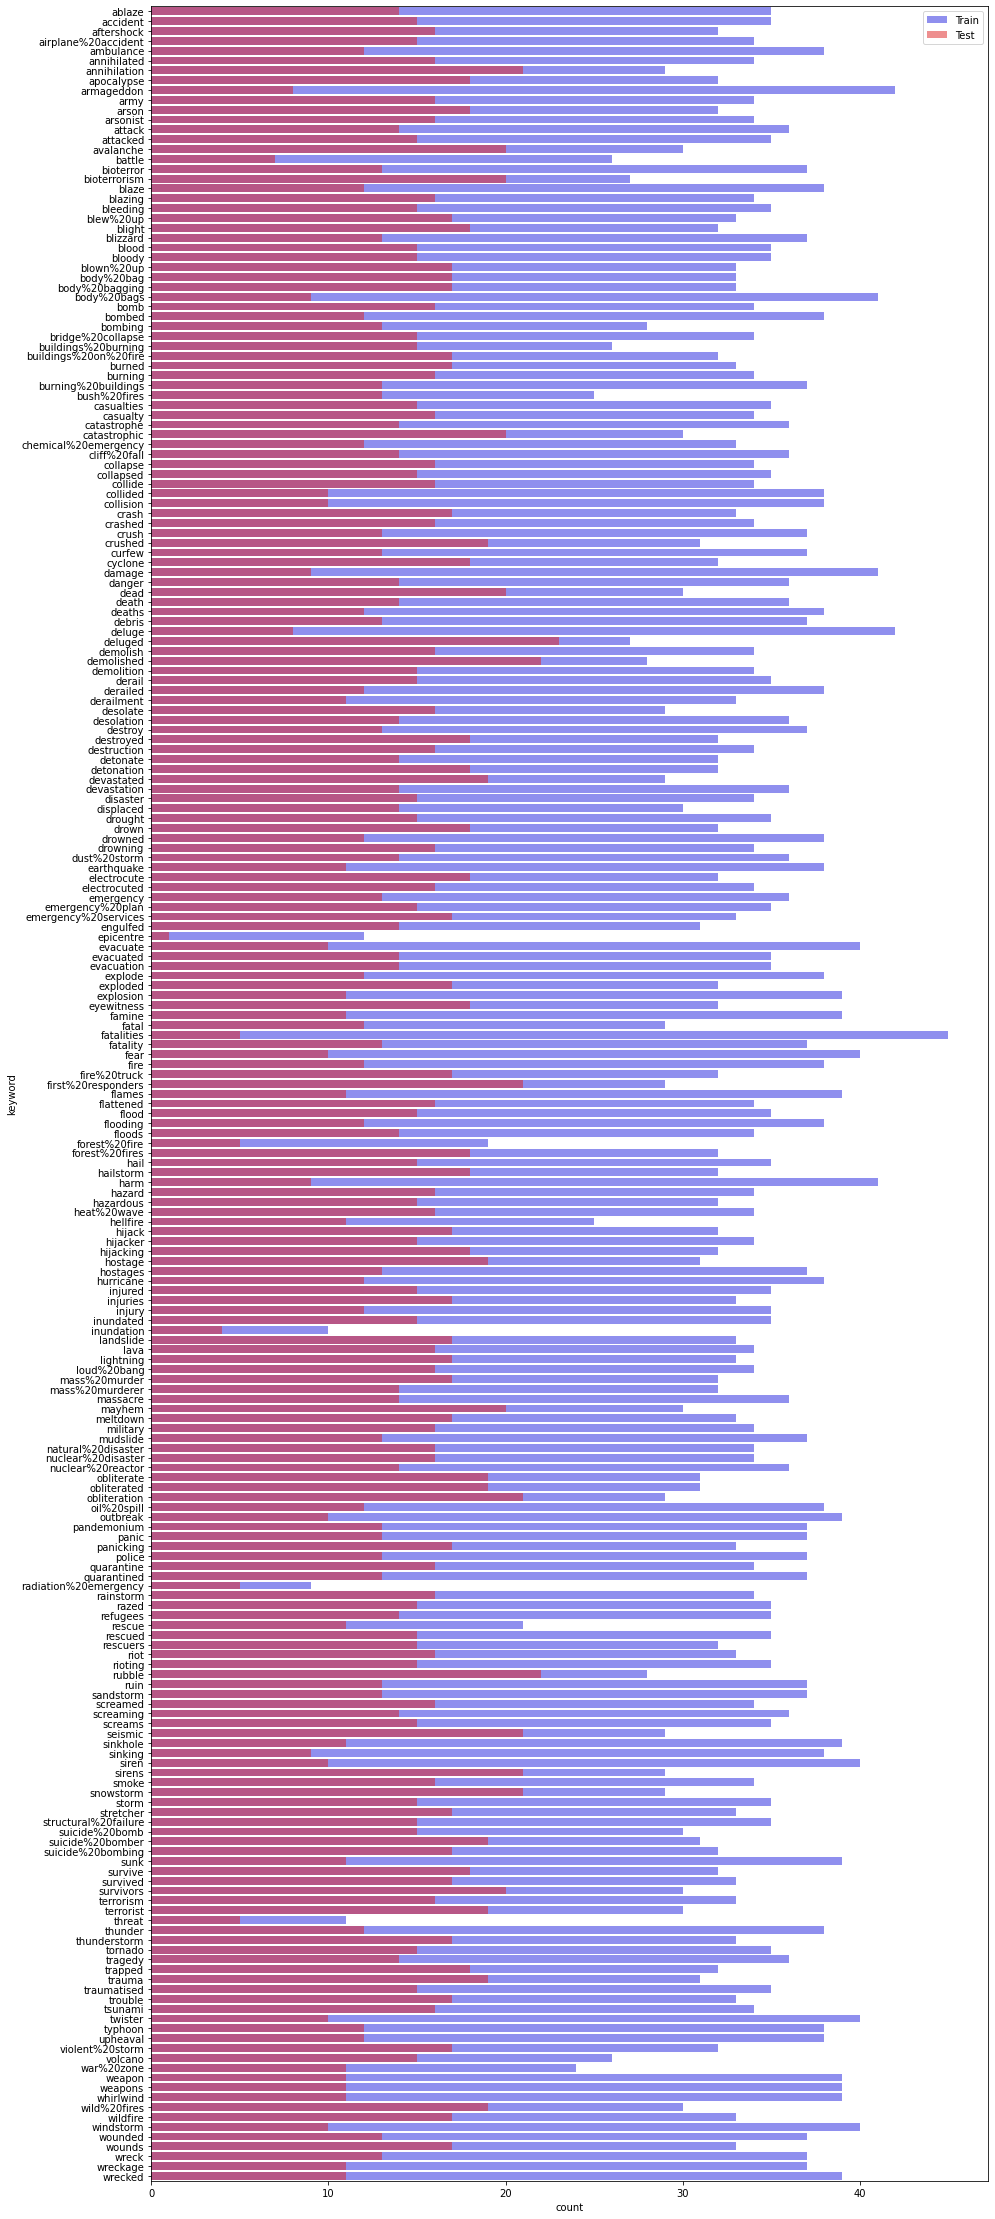

In [11]:
print(train_df['keyword'].nunique())
print(test_df['keyword'].nunique())
plt.figure(figsize=(15,40))
sns.countplot(y=train_df['keyword'],color='b',label='Train',alpha=0.5)
sns.countplot(y=test_df['keyword'],color='r',label='Test',alpha=0.5)
plt.legend()

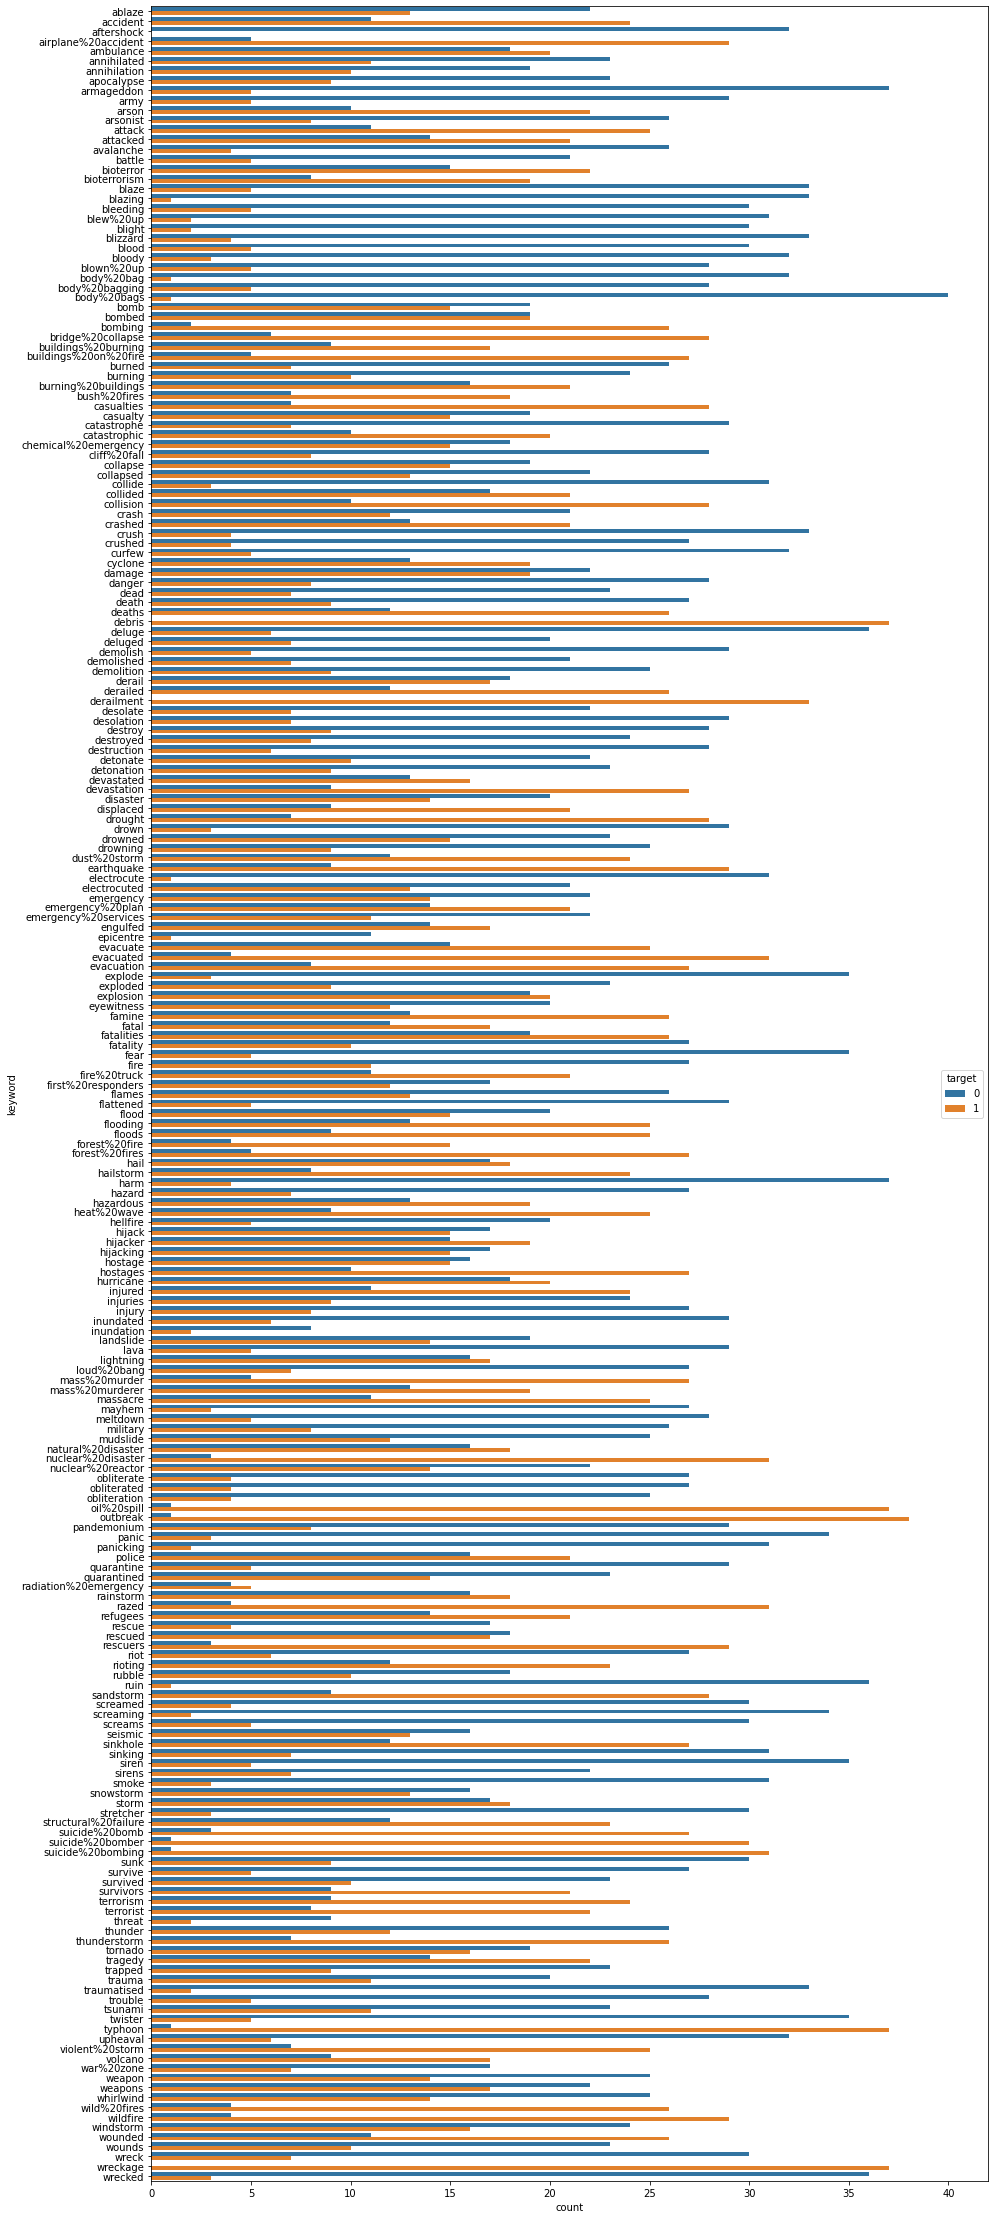

In [12]:
plt.figure(figsize=(15,40))
sns.countplot(data = train_df,y='keyword',hue='target')

In [13]:
import re

In [14]:
additional  = ['rt','rts','retweet']

In [15]:
train_df['processed_text'] = train_df['text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .str.replace("[^a-zA-Z]"," ")\
          .apply(lambda x: [i for i in x.split() if not i in additional])

In [16]:
train_df

,id,keyword,location,text,target,processed_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[just, got, sent, this, photo, from, ruby, ala..."
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"[two, giant, cranes, holding, a, bridge, colla..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[the, out, of, control, wild, fires, in, calif..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[m, utc, km, s, of, volcano, hawaii]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"[police, investigating, after, an, e, bike, co..."


In [17]:
test_df['processed_text'] = test_df['text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .str.replace("[^a-zA-Z]"," ")\
          .apply(lambda x: [i for i in x.split() if not i in additional])

In [18]:
test_df

,id,keyword,location,text,processed_text
0,0,NaN,NaN,Just happened a terrible car crash,"[just, happened, a, terrible, car, crash]"
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","[heard, about, earthquake, is, different, citi..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","[there, is, a, forest, fire, at, spot, pond, g..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,"[apocalypse, lighting, spokane, wildfires]"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,"[typhoon, soudelor, kills, in, china, and, tai..."
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,"[earthquake, safety, los, angeles, safety, fas..."
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,"[storm, in, ri, worse, than, last, hurricane, ..."
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,"[green, line, derailment, in, chicago]"
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,"[meg, issues, hazardous, weather, outlook, hwo]"


In [22]:
stopwords = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]
len(stopwords)

179

In [23]:
def remove_short_abb(thelist):
  result = []
  for word in thelist:
    if ((word in stopwords) or (len(word)>3)):result.append(word)
  return result

In [24]:
train_df['processed_text'] = train_df['processed_text'].apply(lambda thelist: remove_short_abb(thelist))
test_df['processed_text'] = test_df['processed_text'].apply(lambda thelist: remove_short_abb(thelist))

In [25]:
train_df.head()

,id,keyword,location,text,target,processed_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[just, sent, this, photo, from, ruby, alaska, ..."


In [26]:
test_df.head()

,id,keyword,location,text,processed_text
0,0,NaN,NaN,Just happened a terrible car crash,"[just, happened, a, terrible, crash]"
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","[heard, about, earthquake, is, different, citi..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","[there, is, a, forest, fire, at, spot, pond, g..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,"[apocalypse, lighting, spokane, wildfires]"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,"[typhoon, soudelor, kills, in, china, and, tai..."


In [27]:
def listToString(s): 
    
    # initialize an empty string
    str1 = " " 
    
    # return string  
    return (str1.join(s))

In [28]:
train_df['processed_text'] = train_df['processed_text'].apply(lambda s: listToString(s))
test_df['processed_text'] = test_df['processed_text'].apply(lambda s: listToString(s))

In [29]:
train_df

,id,keyword,location,text,target,processed_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake al...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just sent this photo from ruby alaska as smoke...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,giant cranes holding a bridge collapse into ne...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,the out of control wild fires in california ev...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m s of volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigating after an bike collided wi...


In [30]:
test_df

,id,keyword,location,text,processed_text
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities sta...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills in china and taiwan
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety angeles safety fasteners xrwn
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm in worse than last hurricane my city oth...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment in chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,issues hazardous weather outlook


In [31]:
for i in range(len(train_df)):
  train_df['processed_text'].iloc[i] = [word for word in train_df['processed_text'].iloc[i].split()]

train_df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,id,keyword,location,text,target,processed_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[just, sent, this, photo, from, ruby, alaska, ..."
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"[giant, cranes, holding, a, bridge, collapse, ..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[the, out, of, control, wild, fires, in, calif..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[m, s, of, volcano, hawaii]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"[police, investigating, after, an, bike, colli..."


In [32]:
for i in range(len(test_df)):
  test_df['processed_text'].iloc[i] = [word for word in test_df['processed_text'].iloc[i].split()]

test_df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,id,keyword,location,text,processed_text
0,0,NaN,NaN,Just happened a terrible car crash,"[just, happened, a, terrible, crash]"
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","[heard, about, earthquake, is, different, citi..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","[there, is, a, forest, fire, at, spot, pond, g..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,"[apocalypse, lighting, spokane, wildfires]"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,"[typhoon, soudelor, kills, in, china, and, tai..."
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,"[earthquake, safety, angeles, safety, fastener..."
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,"[storm, in, worse, than, last, hurricane, my, ..."
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,"[green, line, derailment, in, chicago]"
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,"[issues, hazardous, weather, outlook]"


In [33]:
!pip install transformers

     |████████████████████████████████| 2.5MB 5.4MB/s 
     |████████████████████████████████| 3.3MB 33.1MB/s 
     |████████████████████████████████| 901kB 36.8MB/s 


In [34]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from tokenizers import BertWordPieceTokenizer
from tqdm.notebook import tqdm
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
import transformers
from transformers import TFAutoModel, AutoTokenizer

In [35]:
def build_model(transformer, max_len=512):
   input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
   sequence_output = transformer(input_word_ids)[0]
   cls_token = sequence_output[:, 0, :]
   x = tf.keras.layers.Dropout(0.35)(cls_token)
 
   # make output dense layer
   out = Dense(1, activation='sigmoid')(x)
  
   model = Model(inputs=input_word_ids, outputs=out)
   model.compile(Adam(lr=3e-5), loss='binary_crossentropy',
                 metrics=[tf.keras.metrics.AUC()])
  
   return model

In [36]:
try:
   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
   print('Running on TPU ', tpu.master())
except ValueError:
   tpu = None
 
if tpu:
   tf.config.experimental_connect_to_cluster(tpu)
   tf.tpu.experimental.initialize_tpu_system(tpu)
   strategy = tf.distribute.TPUStrategy(tpu)
else:
   strategy = tf.distribute.get_strategy()

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


Running on TPU  grpc://10.27.80.122:8470


In [37]:
with strategy.scope():
   transformer_layer = transformers.TFBertModel.from_pretrained('bert-base-uncased')
   model = build_model(transformer_layer, max_len=512)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` 

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 512)]             0         
_________________________________________________________________
tf_bert_model (TFBertModel)  TFBaseModelOutputWithPool 109482240 
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 769       
Total params: 109,483,009
Trainable params: 109,483,009
Non-trainable params: 0
_________________________________________________________________


In [39]:
import transformers
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

In [41]:
import os
save_path = 'distilbert_base_uncased/'
if not os.path.exists(save_path):
   os.makedirs(save_path)
tokenizer.save_pretrained(save_path)

('distilbert_base_uncased/tokenizer_config.json',
 'distilbert_base_uncased/special_tokens_map.json',
 'distilbert_base_uncased/vocab.txt',
 'distilbert_base_uncased/added_tokens.json')

In [42]:
from tokenizers import BertWordPieceTokenizer
fast_tokenizer = BertWordPieceTokenizer('distilbert_base_uncased/vocab.txt', lowercase=True)
fast_tokenizer

Tokenizer(vocabulary_size=30522, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=True, wordpieces_prefix=##)

In [43]:
def fast_encode(texts, tokenizer, size=256, maxlen=512):
   tokenizer.enable_truncation(max_length=maxlen)  # truncate the text and limit it to maxlen
   tokenizer.enable_padding(length=maxlen)         # pad sentences shorter than maxlen
   ids_full = []
  
   for i in tqdm(range(0, len(texts), size)):
       text = texts[i:i+size].tolist()
       encs = tokenizer.encode_batch(text)        
       ids_full.extend([enc.ids for enc in encs])
  
   return np.array(ids_full)

In [44]:
x = fast_encode(train_df.text.astype(str), fast_tokenizer, maxlen=512)

In [49]:
tf.data.Dataset

BATCH_SIZE=64

y=train_df['target'].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=42)

In [51]:
train_df.head()

,id,keyword,location,text,target,processed_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[just, sent, this, photo, from, ruby, alaska, ..."


In [52]:
train_dataset = (
   tf.data.Dataset
     .from_tensor_slices((X_train, y_train))
     .repeat()
     .shuffle(2048)
     .batch(BATCH_SIZE)
   .prefetch(tf.data.experimental.AUTOTUNE)
)

In [53]:
test_data = (
   tf.data.Dataset
   .from_tensor_slices(X_test)
   .batch(BATCH_SIZE)
)

In [54]:
with strategy.scope():
   train_history = model.fit(
     train_dataset,
     steps_per_epoch=150,
     epochs = 10
   )

Epoch 1/10


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'IteratorGetNext:0' shape=(None, 512) dtype=int64>, <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=int64>]
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'IteratorGetNext:0' shape=(None, 512) dtype=int64>, <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=int64>]


150/150 [==============================] - 116s 254ms/step - loss: 0.5464 - auc: 0.7801
Epoch 2/10
150/150 [==============================] - 38s 253ms/step - loss: 0.3363 - auc: 0.9189
Epoch 3/10
150/150 [==============================] - 38s 254ms/step - loss: 0.2292 - auc: 0.9617
Epoch 4/10
150/150 [==============================] - 38s 254ms/step - loss: 0.1465 - auc: 0.9837
Epoch 5/10
150/150 [==============================] - 38s 255ms/step - loss: 0.0872 - auc: 0.9947
Epoch 6/10
150/150 [==============================] - 38s 254ms/step - loss: 0.0697 - auc: 0.9965
Epoch 7/10
150/150 [==============================] - 38s 254ms/step - loss: 0.0495 - auc: 0.9984
Epoch 8/10
150/150 [==============================] - 38s 254ms/step - loss: 0.0420 - auc: 0.9987
Epoch 9/10
150/150 [==============================] - 38s 255ms/step - loss: 0.0425 - auc: 0.9986
Epoch 10/10
150/150 [==============================] - 38s 254ms/step - loss: 0.0376 - auc: 0.9990


In [55]:
predictions = model.predict(X_test)

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 512) dtype=int64>]


In [57]:
from itertools import chain
flattened_predictions = list(chain.from_iterable(predictions))

In [58]:
for i in range(len(flattened_predictions)):
 if flattened_predictions[i] <= 0.5:
   flattened_predictions[i] = 0
 else:
   flattened_predictions[i] = 1

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, flattened_predictions)

0.8069241011984021

array([[ 101, 1030, 2585, ...,    0,    0,    0],
       [ 101, 4553, 2129, ...,    0,    0,    0],
       [ 101, 2448, 2041, ...,    0,    0,    0],
       ...,
       [ 101, 1037, 6186, ...,    0,    0,    0],
       [ 101, 2070, 6473, ...,    0,    0,    0],
       [ 101, 1030, 9679, ...,    0,    0,    0]])

In [61]:
x_test = fast_encode(test_df.text.astype(str), fast_tokenizer, maxlen=512)

In [63]:
submission_test_data = (
   tf.data.Dataset
   .from_tensor_slices(x_test)
   .batch(BATCH_SIZE)
)

In [65]:
submission_predictions = model.predict(x_test)

In [66]:
submission_flattened_predictions = list(chain.from_iterable(submission_predictions))

In [67]:
for i in range(len(submission_flattened_predictions)):
 if submission_flattened_predictions[i] <= 0.5:
   submission_flattened_predictions[i] = 0
 else:
   submission_flattened_predictions[i] = 1

In [68]:
submission_flattened_predictions

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,


In [69]:
sample_submission = pd.read_csv("sample_submission.csv")

In [70]:
sample_submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [71]:
sample_submission["target"] = submission_flattened_predictions

In [72]:
sample_submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [73]:
sample_submission.to_csv("submission_final.csv", index=False)

In [74]:
sample_submission.shape

(3263, 2)

In [75]:
test_df

,id,keyword,location,text,processed_text
0,0,NaN,NaN,Just happened a terrible car crash,"[just, happened, a, terrible, crash]"
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","[heard, about, earthquake, is, different, citi..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","[there, is, a, forest, fire, at, spot, pond, g..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,"[apocalypse, lighting, spokane, wildfires]"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,"[typhoon, soudelor, kills, in, china, and, tai..."
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,"[earthquake, safety, angeles, safety, fastener..."
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,"[storm, in, worse, than, last, hurricane, my, ..."
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,"[green, line, derailment, in, chicago]"
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,"[issues, hazardous, weather, outlook]"
